In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cmocean.cm as cm
from salishsea_tools import viz_tools
import arrow
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Constant and data rang
syear = 2018
eyear = 2018
smonth = 7
emonth = 9
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 30)
print (startdate, enddate)

2018-07-01T00:00:00+00:00 2018-09-30T00:00:00+00:00


In [3]:
mesh0 = xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask202108.nc')
mesh = nc.Dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc')
meshxr = xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc')
bathy0 = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202108.nc')
bathy = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202310b.nc')
thalweg_SI = '/ocean/atall/MOAD/analysis-abdoul/thalweg_files/SaanichInlet_thalweg.txt' 
thalweg_HC = '/ocean/atall/MOAD/analysis-abdoul/thalweg_files/HoodCanal_thalweg.txt' 
thalweg_SoG = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_ptsSI = np.loadtxt(thalweg_SI, delimiter=' ', dtype=int)
thalweg_ptsHC = np.loadtxt(thalweg_HC, delimiter=' ', dtype=int)
thalweg_ptsSoG = np.loadtxt(thalweg_SoG, delimiter=' ', dtype=int)
umask = mesh.variables['umask'][0,...]
vmask = mesh.variables['vmask'][0,...]
tmask = mesh.variables['tmask'][0,...]
depth = mesh.variables['gdept_0'][:]
tmask0 = mesh0.tmask
mbathy0 = mesh0.mbathy
tmaskxr = meshxr.tmask
mbathy = meshxr.mbathy


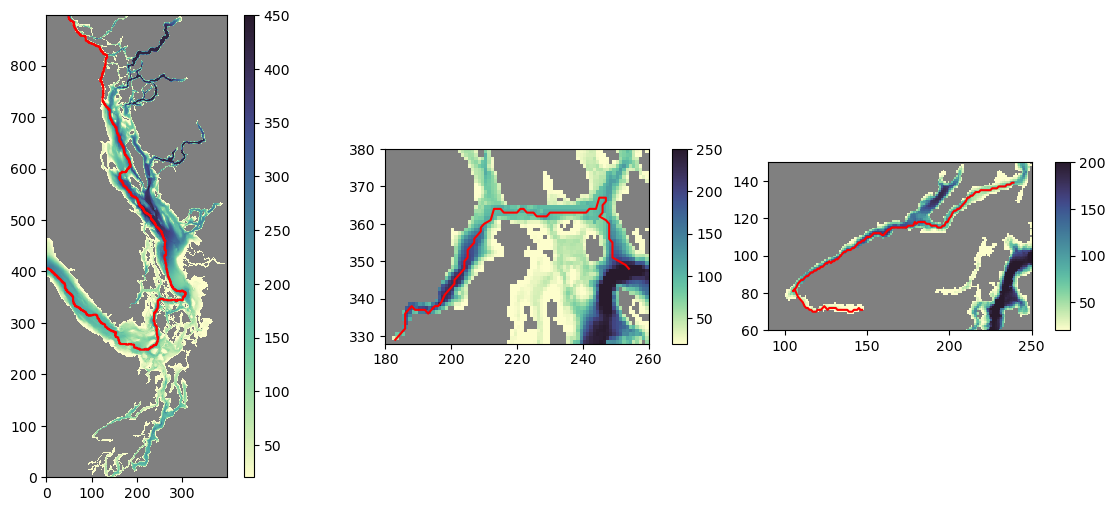

In [4]:
line, col = (1, 3)
fig, ax = plt.subplots(line, col, figsize=(14, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
for ii in range(0, 0+col):
    if ii==0:
        thalweg=thalweg_ptsSoG
        vmin,vmax=(20,450)
    elif ii==1:
        thalweg=thalweg_ptsSI
        ax[ii].set_xlim([180, 260])
        ax[ii].set_ylim([328, 380])
        vmin,vmax=(20,250)
    else:
        thalweg=thalweg_ptsHC
        ax[ii].set_xlim(90,250)
        ax[ii].set_ylim(60,150)
        vmin,vmax=(20,200)

    im = ax[ii].pcolormesh(bathy.variables['Bathymetry'][:], cmap=mycmap, vmin=vmin, vmax=vmax)
    ax[ii].plot(thalweg[:,1],thalweg[:,0],color='r')
    viz_tools.set_aspect(ax[ii]);
    divider = make_axes_locatable(ax[ii])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


v202111 at the bottom


Text(0.5, 0.98, '2018-07-01T00:00:00+00:00-2018-09-30T00:00:00+00:00 - v202111')

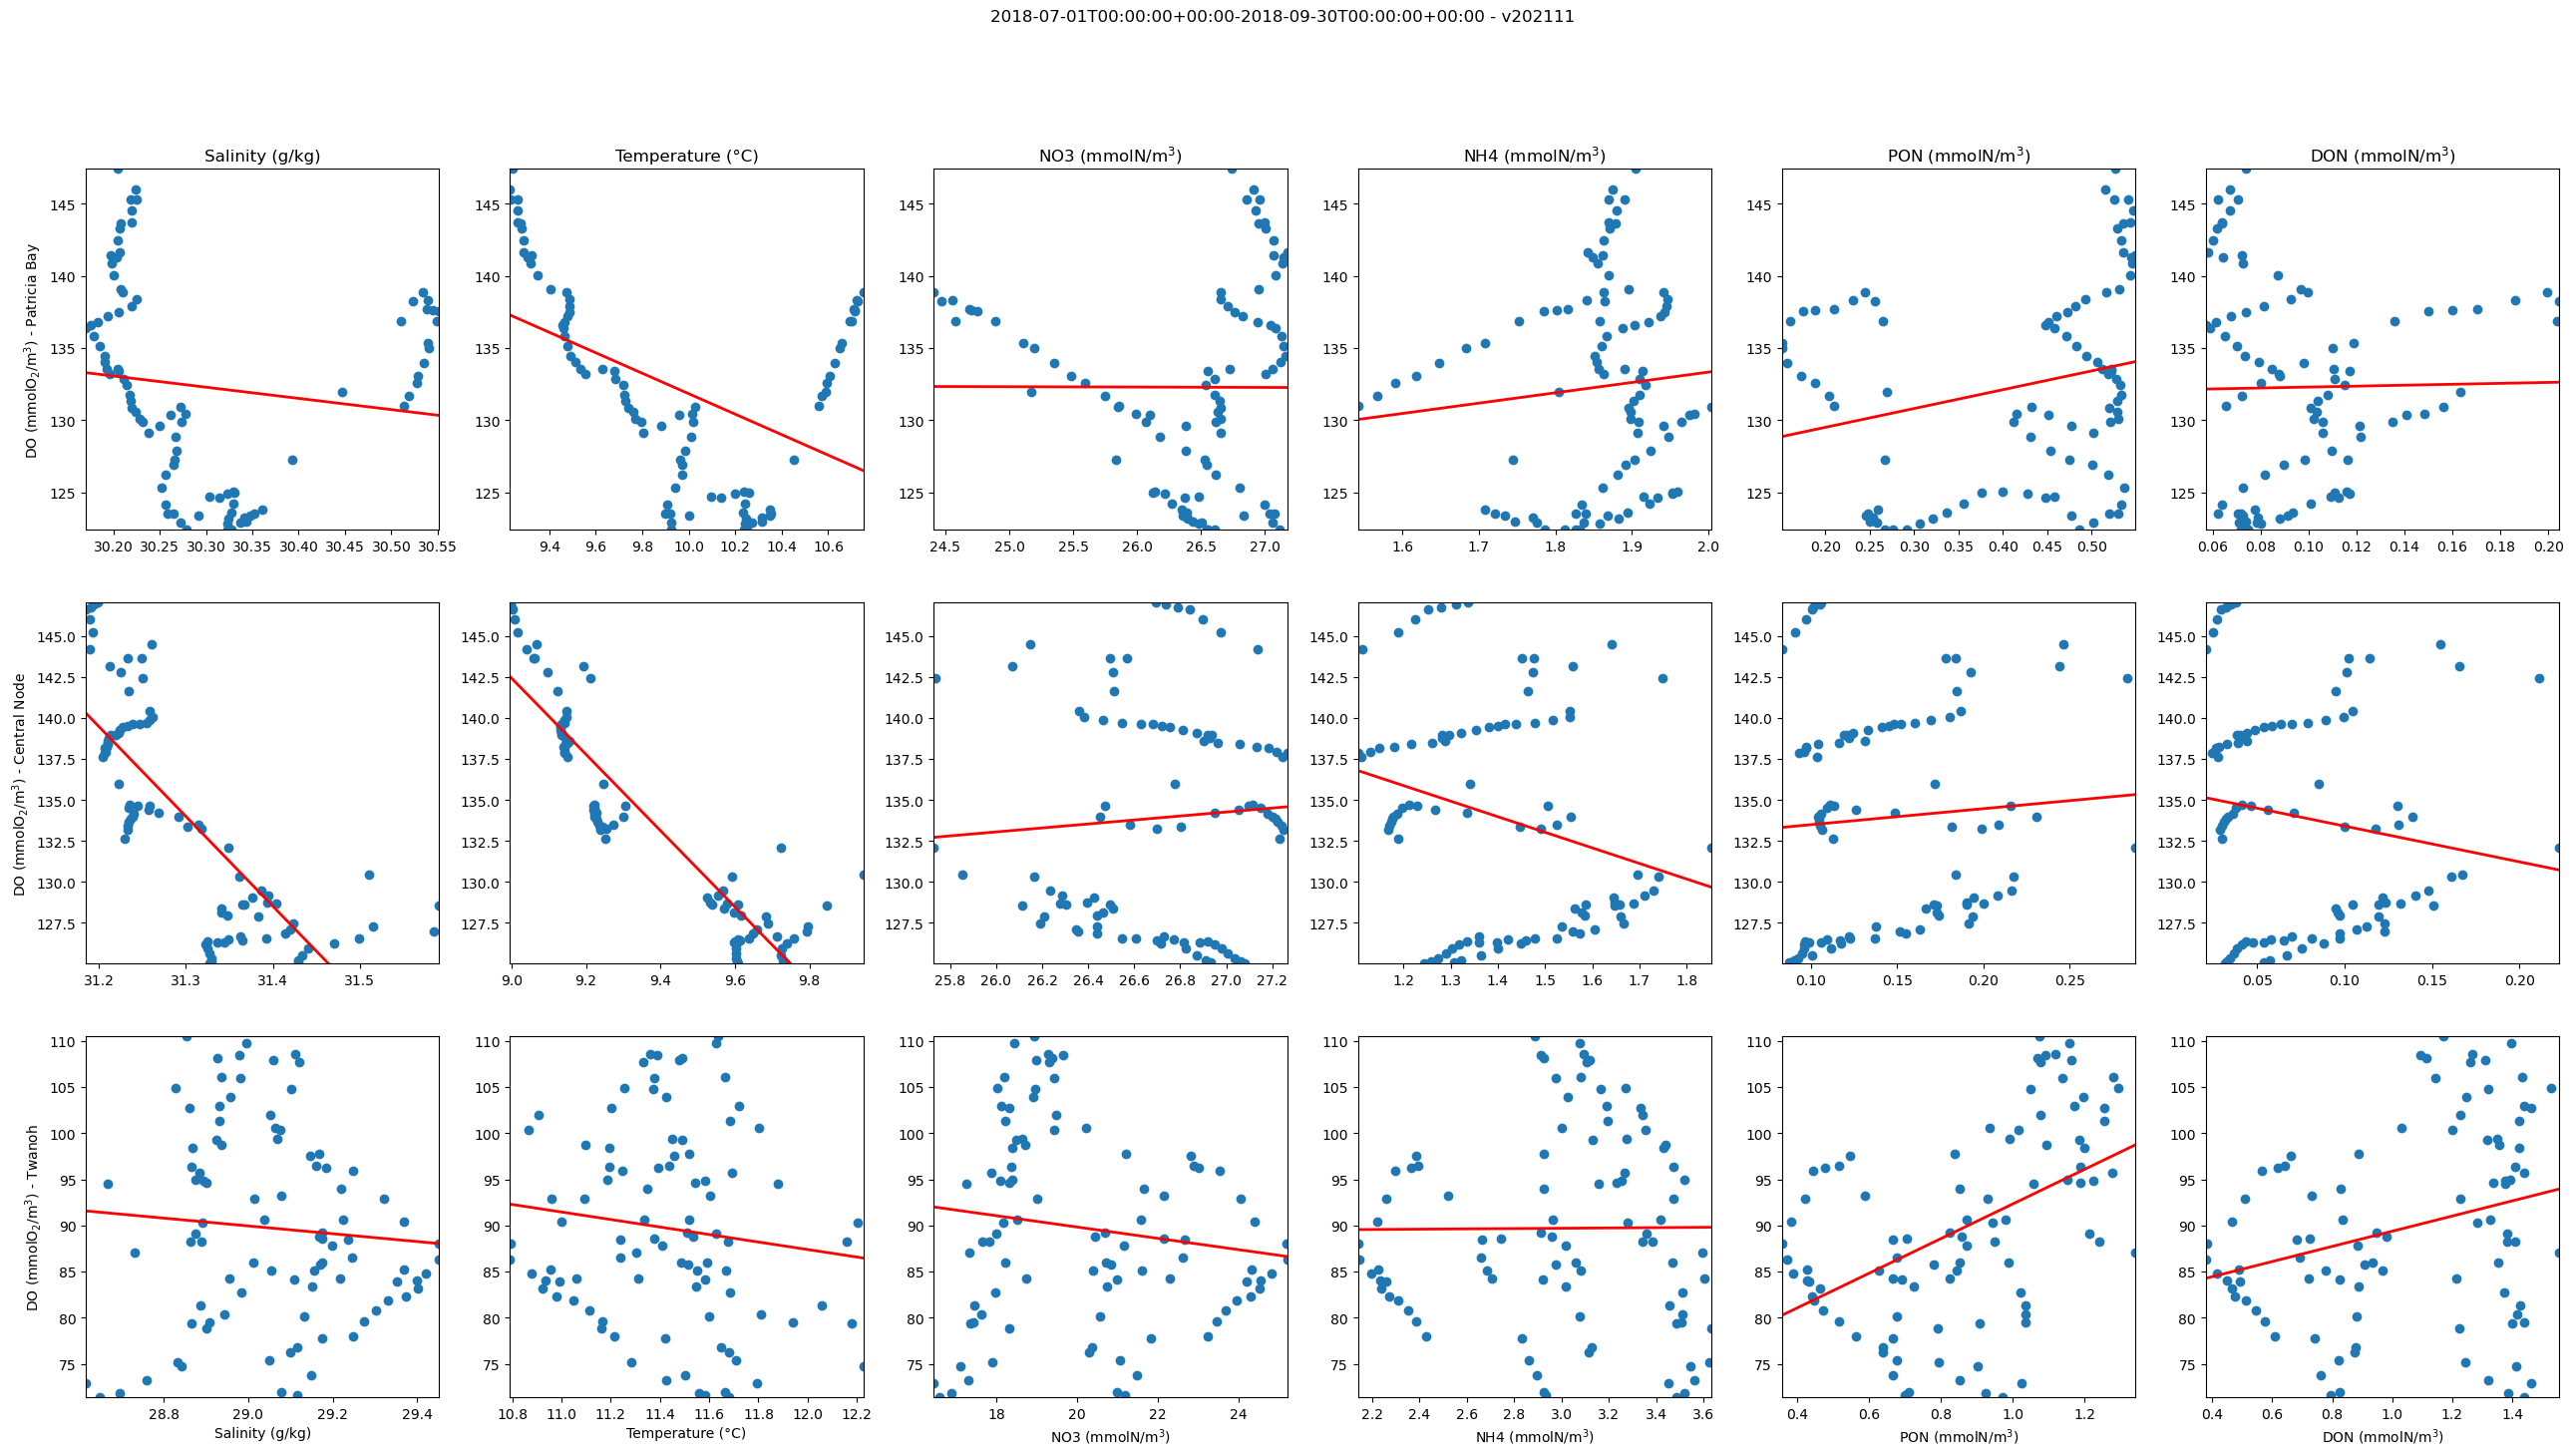

In [8]:
print('v202111 at the bottom')
line, col = (3, 6)
fig, ax = plt.subplots(line, col, figsize=(32, 16))
xlabel = list(['Salinity (g/kg)','Temperature (°C)','NO3 (mmolN/m$^3$)','NH4 (mmolN/m$^3$)','PON (mmolN/m$^3$)','DON (mmolN/m$^3$)','SMS (mmolO$_2$/m$^3$/s)'])
place = list(['Patricia Bay','Central Node','Twanoh'])
dir = '/results2/SalishSea/nowcast-green.202111/'
for i in range(0, 0+line):
    if i==0:
        jj, ii = (353, 209)
    elif i==1:
        jj, ii = (423, 266)
    else:
        jj, ii = (72, 123)   
    first = True
    for iii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
        year = day.year
        yr2 = day.strftime("%y")
        month = day.month
        Month = day.strftime("%b").lower()
        day = day.day
        # set up filename to follow NEMO conventions
        fchem90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
        with xr.open_dataset(fchem90) as ds_chem90:
            oxy0 = ds_chem90['dissolved_oxygen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
        fbiol90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_biol_T.nc'
        with xr.open_dataset(fbiol90) as ds_biol90:
            nit0 = ds_biol90['nitrate'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            amm0 = ds_biol90['ammonium'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            pon0 = ds_biol90['particulate_organic_nitrogen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            don0 = ds_biol90['dissolved_organic_nitrogen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
        fgrdT90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_grid_T.nc'
        with xr.open_dataset(fgrdT90) as ds_grdT90:
            sal0 = ds_grdT90['vosaline'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            tem0 = ds_grdT90['votemper'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
        if first:
            first = False
            oxy = oxy0
            pon = pon0
            don = don0
            nit = nit0
            amm = amm0
            tem = tem0
            sal = sal0
        else:
            oxy = xr.concat([oxy, oxy0], dim='time_counter')
            nit = xr.concat([nit, nit0], dim='time_counter')
            amm = xr.concat([amm, amm0], dim='time_counter')
            pon = xr.concat([pon, pon0], dim='time_counter')
            don = xr.concat([don, don0], dim='time_counter')
            sal = xr.concat([sal, sal0], dim='time_counter')
            tem = xr.concat([tem, tem0], dim='time_counter')

    for j  in range(0, 0+col):
        if j==0:
            varx = sal
        elif j==1:
            varx = tem
        elif j==2:
            varx = nit
        elif j==3:
            varx = amm
        elif j==4:
            varx = pon
        elif j==5:
            varx = don
                           
        vary = oxy
        ax[i,j].scatter(varx, vary)
        # linear regression
        p1, p0 = np.polyfit(varx, vary, deg=1)  # slope, intercept
        ax[i,j].axline(xy1=(0, p0), slope=p1, color='r', lw=2)
        ax[i,j].set_xlim(np.min(varx),np.max(varx))
        ax[i,j].set_ylim(np.min(vary),np.max(vary))
        ax[2,j].set_xlabel(f'{xlabel[j]}')
        ax[0,j].set_title(f'{xlabel[j]}')
        ax[i,0].set_ylabel(f'DO (mmolO$_2$/m$^3$) - {place[i]}')

fig.suptitle(f'{startdate}-{enddate} - v202111')


REF=90,PSR=1e-4,Bremin=8.5 at the bottom


Text(0.5, 0.98, '2018-07-01T00:00:00+00:00-2018-09-30T00:00:00+00:00 - REF=90,PSR=1e-4,Bremin=8.5')

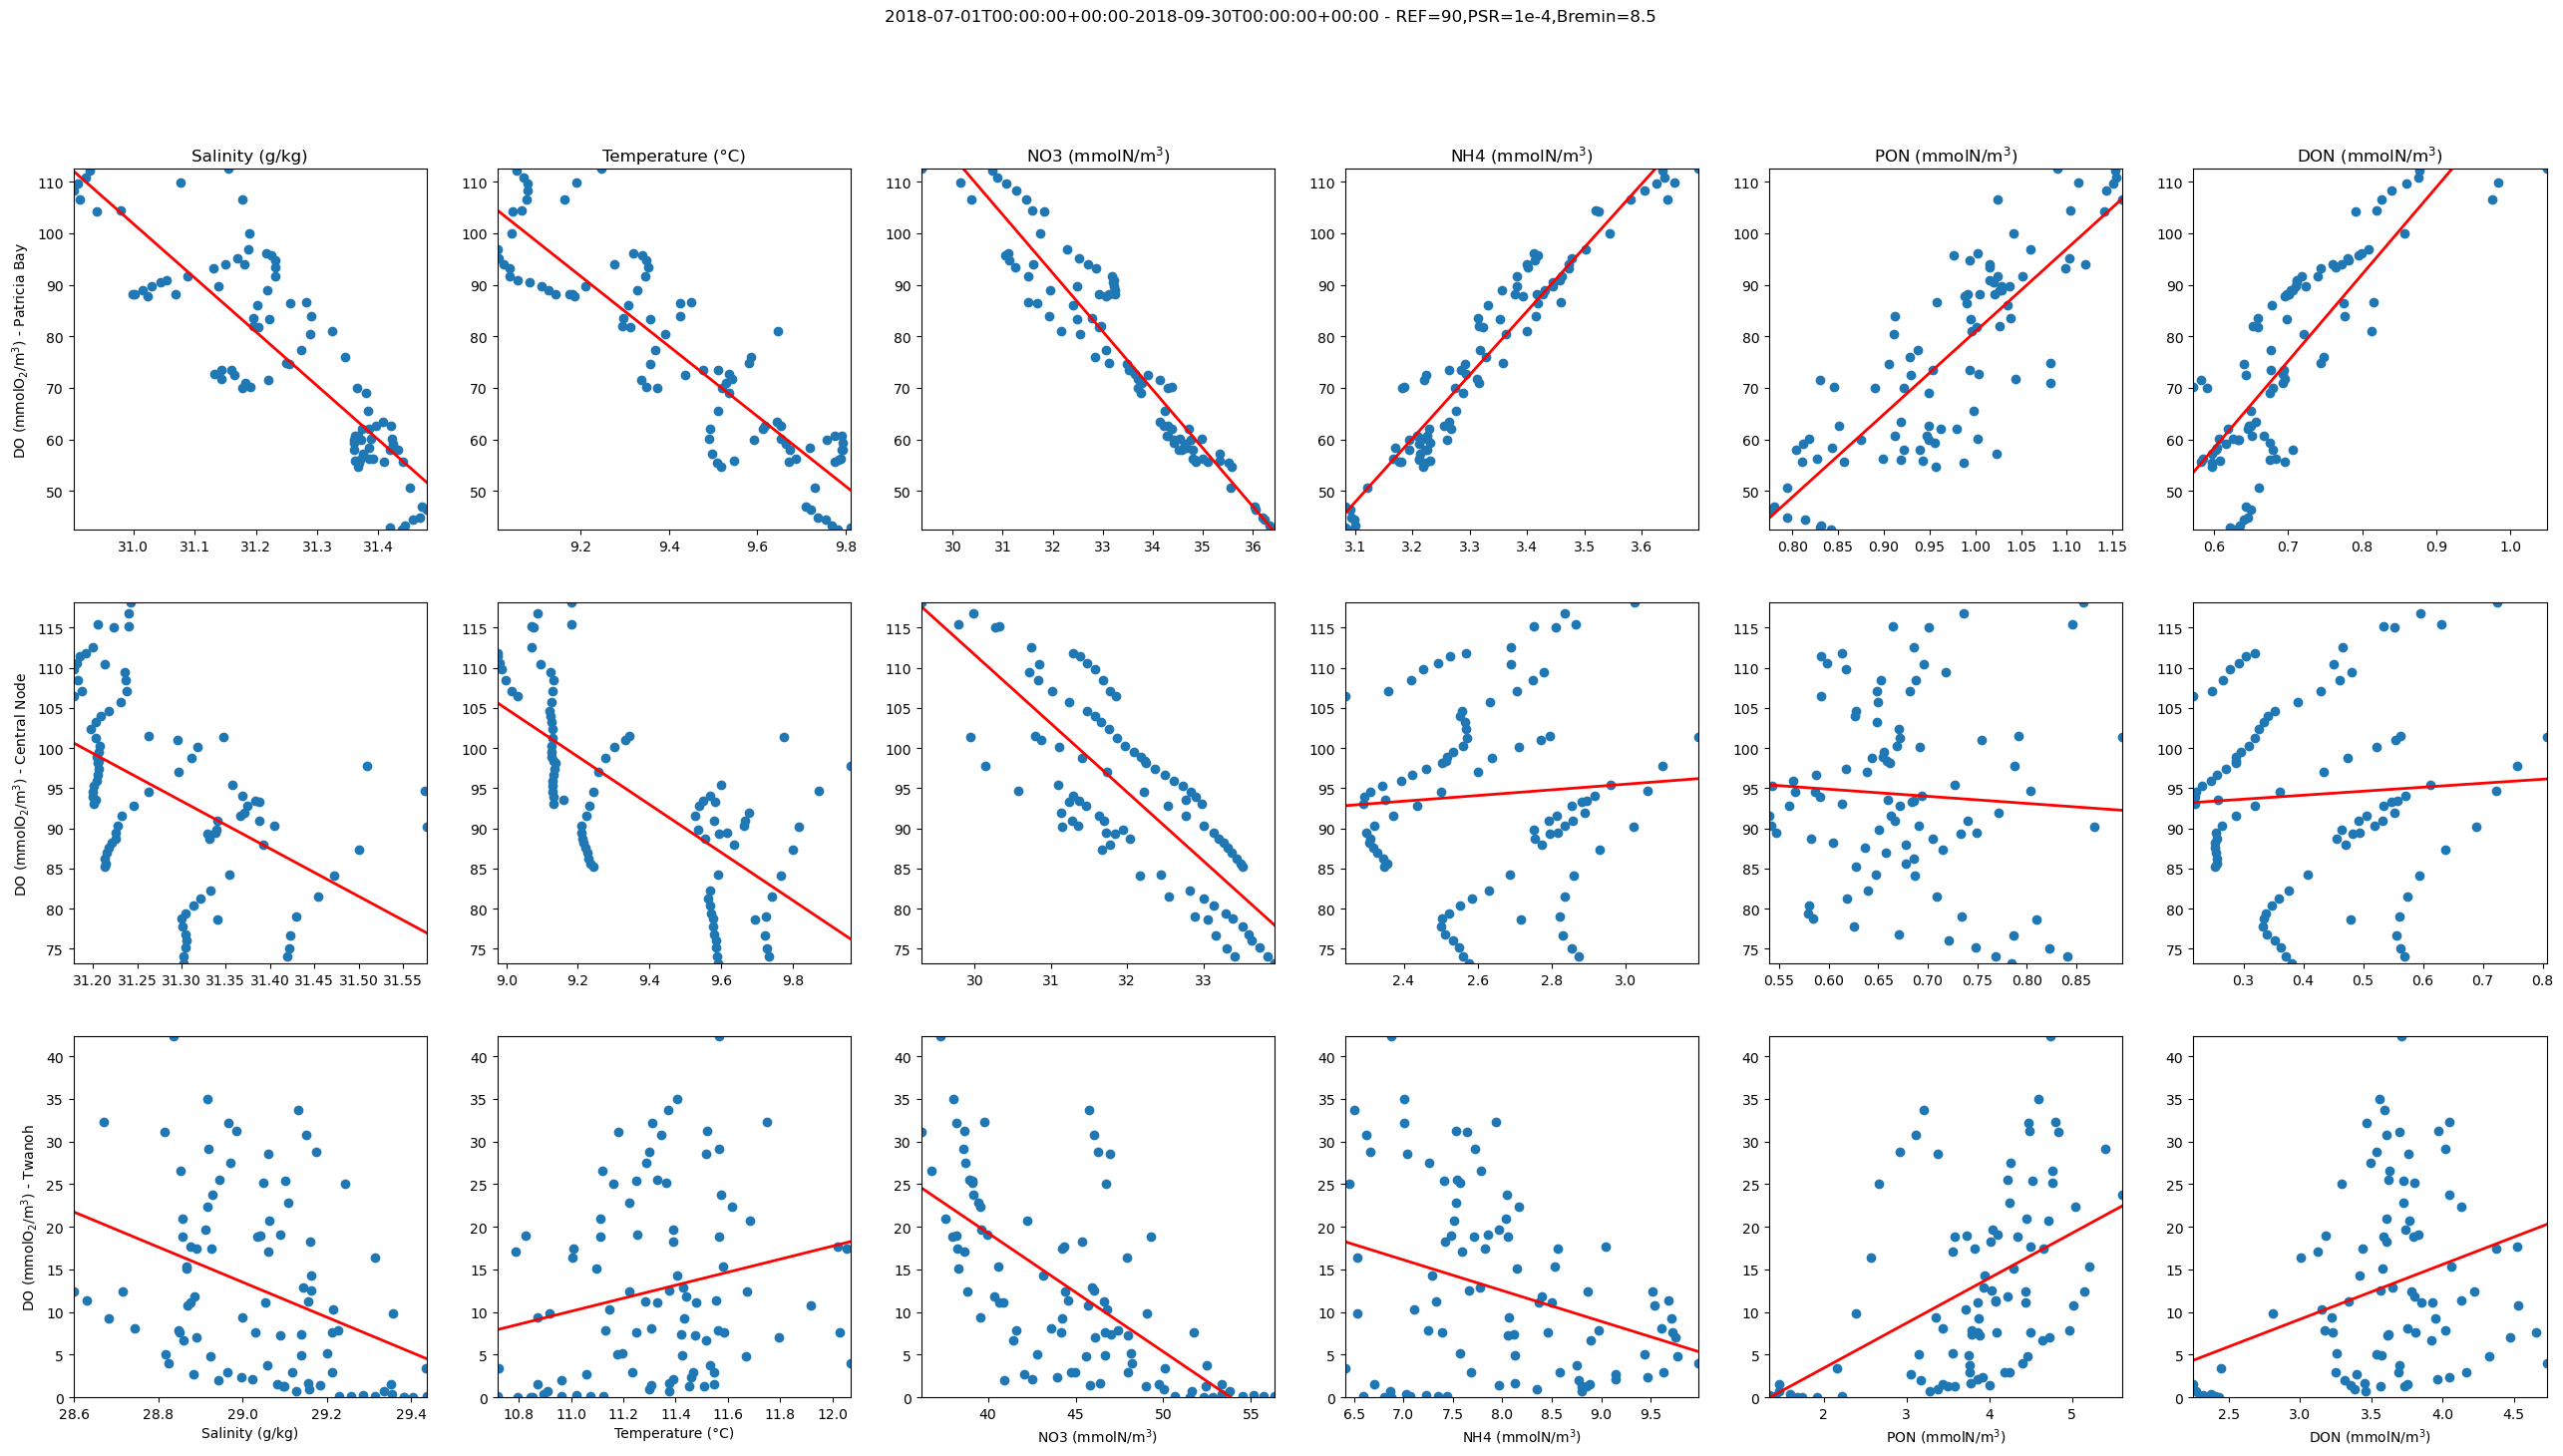

: 

In [9]:
print('REF=90,PSR=1e-4,Bremin=8.5 at the bottom')
line, col = (3, 6)
fig, ax = plt.subplots(line, col, figsize=(32, 16))
xlabel = list(['Salinity (g/kg)','Temperature (°C)','NO3 (mmolN/m$^3$)','NH4 (mmolN/m$^3$)','PON (mmolN/m$^3$)','DON (mmolN/m$^3$)','SMS (mmolO$_2$/m$^3$/s)'])
place = list(['Patricia Bay','Central Node','Twanoh'])
dir = '/ocean/sallen/timbucktwo/oxygen/'
for i in range(0, 0+line):
    if i==0:
        jj, ii = (353, 209)
    elif i==1:
        jj, ii = (423, 266)
    else:
        jj, ii = (72, 123)   
    first = True
    for iii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
        year = day.year
        yr2 = day.strftime("%y")
        month = day.month
        Month = day.strftime("%b").lower()
        day = day.day
        # set up filename to follow NEMO conventions
        fchem90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
        with xr.open_dataset(fchem90) as ds_chem90:
            oxy0 = ds_chem90['dissolved_oxygen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
        fbiol90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_biol_T.nc'
        with xr.open_dataset(fbiol90) as ds_biol90:
            nit0 = ds_biol90['nitrate'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            amm0 = ds_biol90['ammonium'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            pon0 = ds_biol90['particulate_organic_nitrogen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            don0 = ds_biol90['dissolved_organic_nitrogen'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
        fgrdT90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_grid_T.nc'
        with xr.open_dataset(fgrdT90) as ds_grdT90:
            sal0 = ds_grdT90['vosaline'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
            tem0 = ds_grdT90['votemper'][0, mbathy[0, jj, ii]-1, jj, ii].where(tmaskxr[0, mbathy[0, jj, ii]-1, jj, ii] == 1)
        if first:
            first = False
            oxy = oxy0
            pon = pon0
            don = don0
            nit = nit0
            amm = amm0
            tem = tem0
            sal = sal0
        else:
            oxy = xr.concat([oxy, oxy0], dim='time_counter')
            nit = xr.concat([nit, nit0], dim='time_counter')
            amm = xr.concat([amm, amm0], dim='time_counter')
            pon = xr.concat([pon, pon0], dim='time_counter')
            don = xr.concat([don, don0], dim='time_counter')
            sal = xr.concat([sal, sal0], dim='time_counter')
            tem = xr.concat([tem, tem0], dim='time_counter')

    for j  in range(0, 0+col):
        if j==0:
            varx = sal
        elif j==1:
            varx = tem
        elif j==2:
            varx = nit
        elif j==3:
            varx = amm
        elif j==4:
            varx = pon
        elif j==5:
            varx = don
                           
        vary = oxy
        ax[i,j].scatter(varx, vary)
        # linear regression
        p1, p0 = np.polyfit(varx, vary, deg=1)  # slope, intercept
        ax[i,j].axline(xy1=(0, p0), slope=p1, color='r', lw=2)
        ax[i,j].set_xlim(np.min(varx),np.max(varx))
        ax[i,j].set_ylim(np.min(vary),np.max(vary))
        ax[2,j].set_xlabel(f'{xlabel[j]}')
        ax[0,j].set_title(f'{xlabel[j]}')
        ax[i,0].set_ylabel(f'DO (mmolO$_2$/m$^3$) - {place[i]}')

fig.suptitle(f'{startdate}-{enddate} - REF=90,PSR=1e-4,Bremin=8.5')


In [5]:
# Constant and data rang
syear = 2018
eyear = 2018
smonth = 11
emonth = 11
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 5)
print (startdate, enddate)

2018-11-01T00:00:00+00:00 2018-11-05T00:00:00+00:00


# v202111 along thalwegs

Text(0.5, 0.98, '1-5 Nov 2018: v202111')

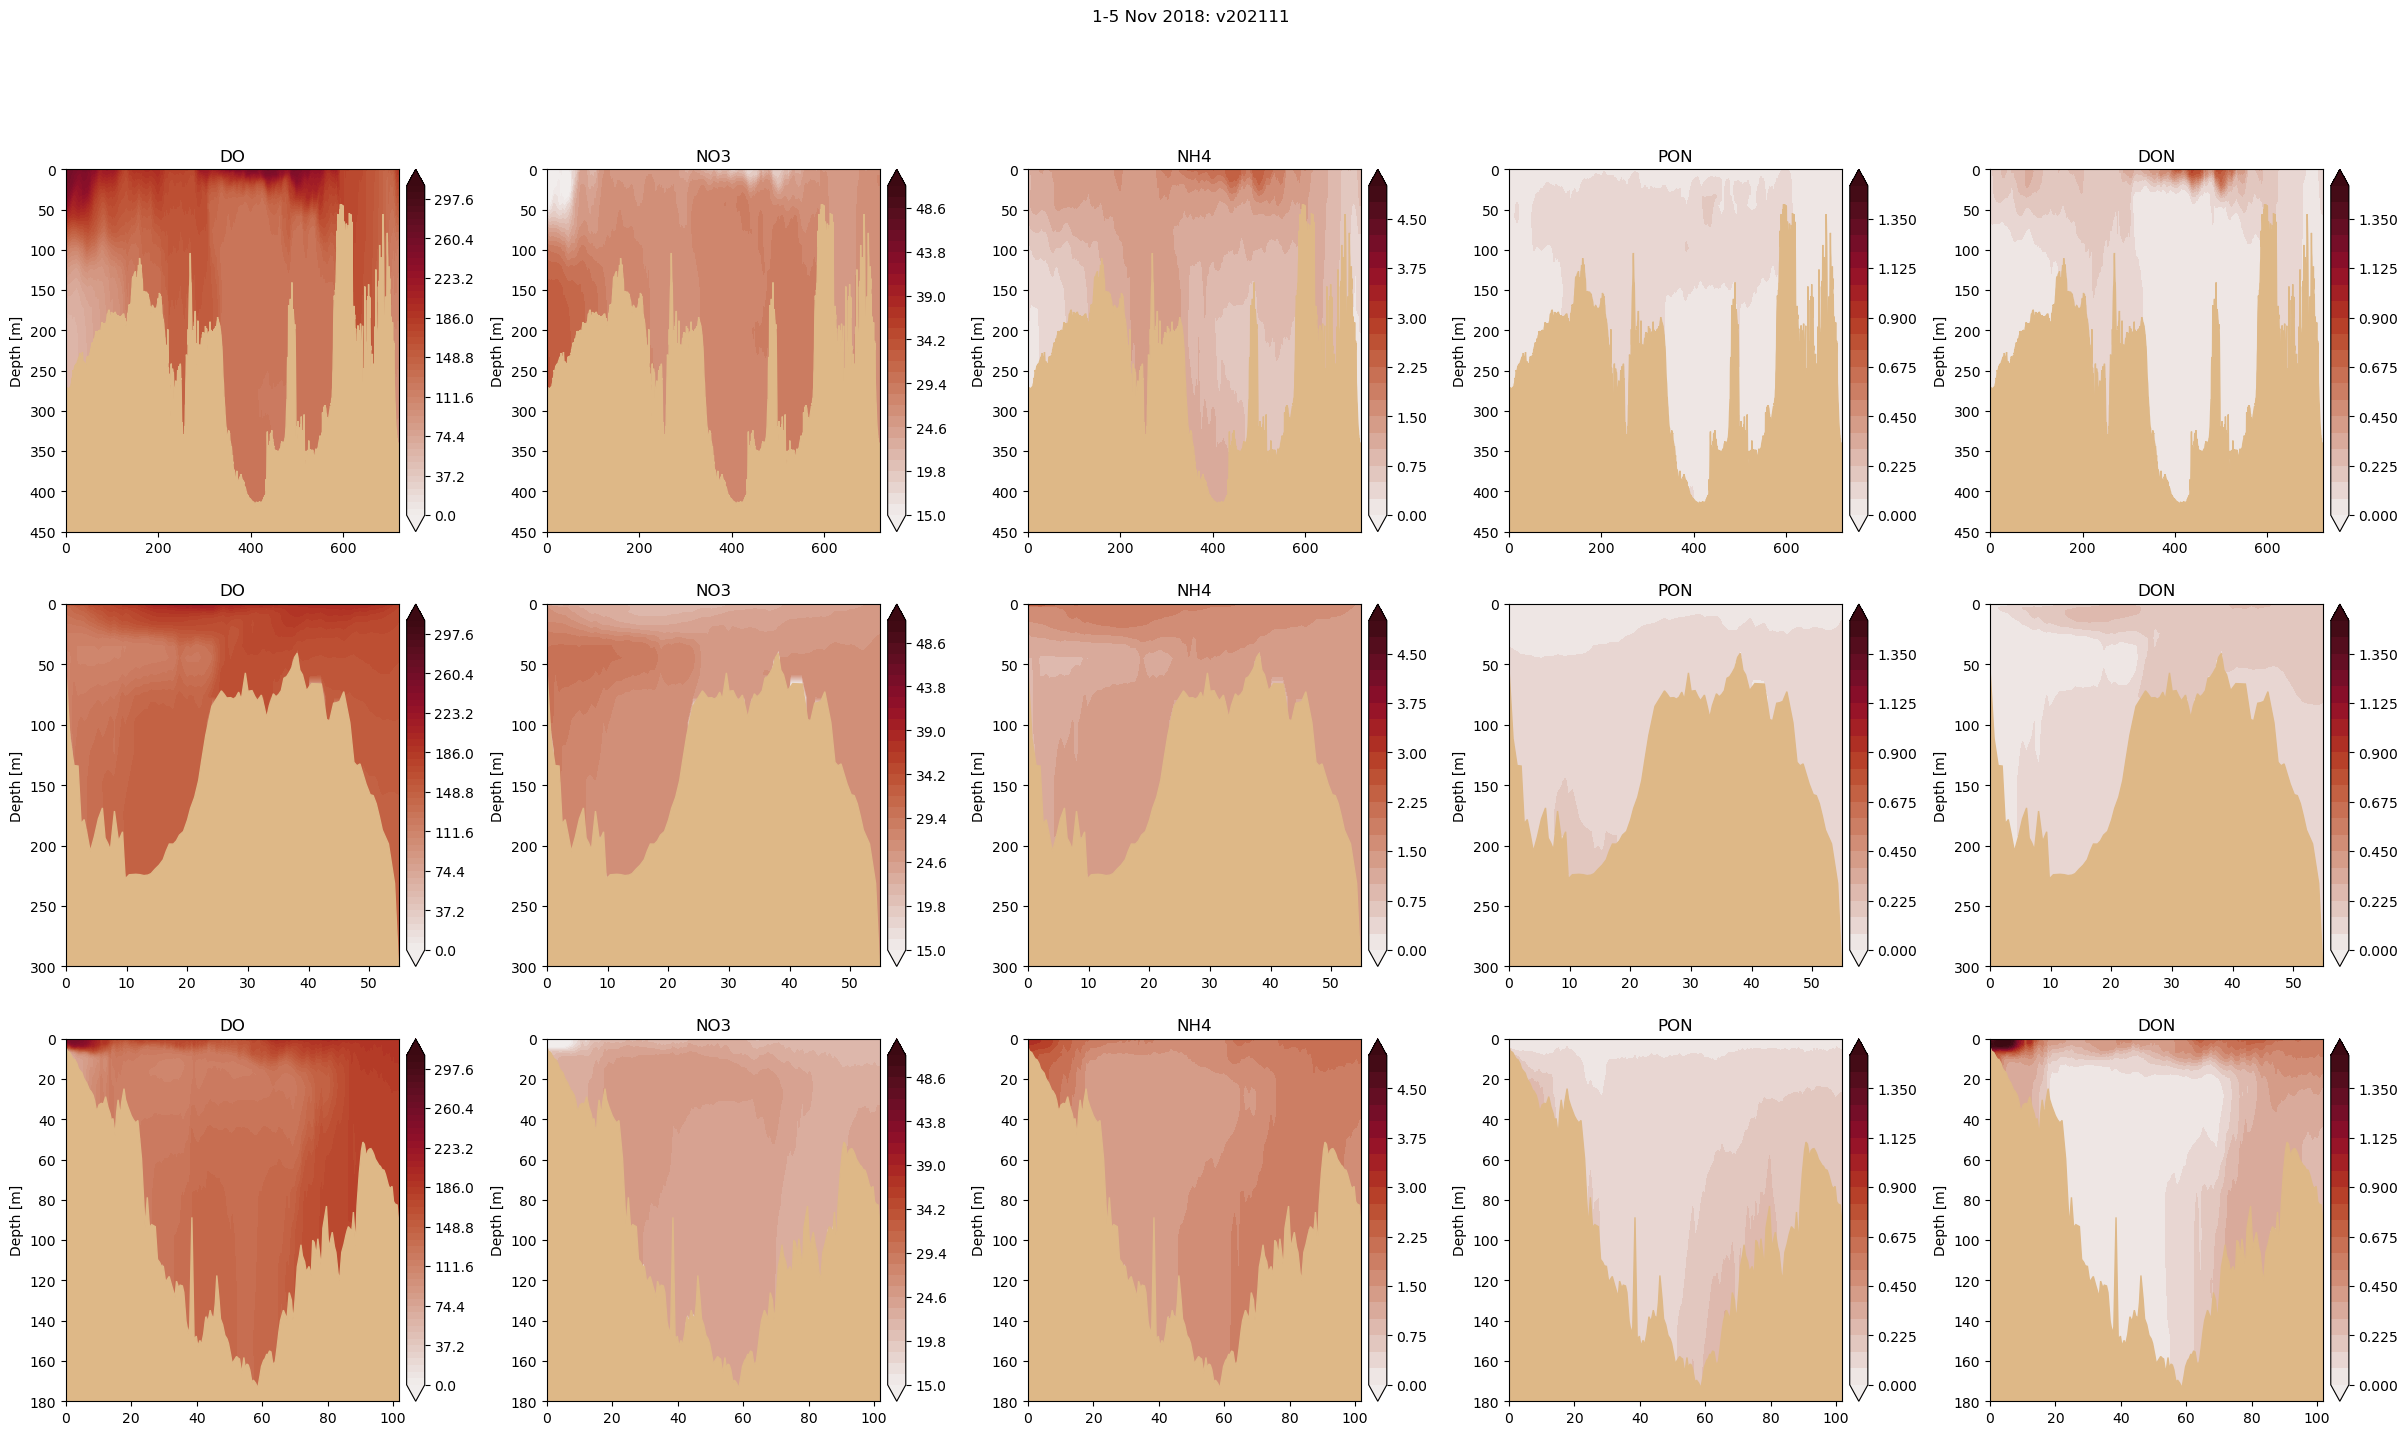

In [11]:
line, col = (3, 5)
fig, axs = plt.subplots(line, col, figsize=(30, 16))
title = list(['DO','NO3','NH4','PON','DON'])
dir = '/results2/SalishSea/nowcast-green.202111/'
for ii in range(0, line):
    if ii==0:
        thalweg=thalweg_ptsSoG
        depmin=450
        vmin,vmax=(20,450)
    elif ii==1:
        thalweg=thalweg_ptsSI[::-1]
        depmin=300
        vmin,vmax=(20,250)
    else:
        thalweg=thalweg_ptsHC
        depmin=180
        vmin,vmax=(20,200)
    first = True
    for iii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
        year = day.year
        yr2 = day.strftime("%y")
        month = day.month
        Month = day.strftime("%b").lower()
        day = day.day
        # set up filename to follow NEMO conventions
        fchem90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
        with xr.open_dataset(fchem90) as ds_chem90:
            oxy0 = ds_chem90['dissolved_oxygen']
        fbiol90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_biol_T.nc'
        with xr.open_dataset(fbiol90) as ds_biol90:
            nit0 = ds_biol90['nitrate']
            amm0 = ds_biol90['ammonium']
            pon0 = ds_biol90['particulate_organic_nitrogen']
            don0 = ds_biol90['dissolved_organic_nitrogen']
        fgrdT90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_grid_T.nc'
        with xr.open_dataset(fgrdT90) as ds_grdT90:
            sal0 = ds_grdT90['vosaline']
            tem0 = ds_grdT90['votemper']
        if first:
            first = False
            oxy = oxy0
            pon = pon0
            don = don0
            nit = nit0
            amm = amm0
            tem = tem0
            sal = sal0
        else:
            oxy = xr.concat([oxy, oxy0], dim='time_counter')
            nit = xr.concat([nit, nit0], dim='time_counter')
            amm = xr.concat([amm, amm0], dim='time_counter')
            pon = xr.concat([pon, pon0], dim='time_counter')
            don = xr.concat([don, don0], dim='time_counter')
            sal = xr.concat([sal, sal0], dim='time_counter')
            tem = xr.concat([tem, tem0], dim='time_counter')
    
    for jj  in range(0, col):
        cmap = cm.amp
        if jj==0:
            vars = oxy
            space = np.linspace(0, 310, 51)
        elif jj==1:
            vars=nit
            space = np.linspace(15, 51, 31)
        elif jj==2:
            vars=amm
            space = np.linspace(0, 5, 21)
        elif jj==3:
            vars=pon
            space = np.linspace(0, 1.5, 21)
        else:
            vars=don
            space = np.linspace(0, 1.5, 21)

        dep_thal, distance, var_thal = vis.load_thalweg(
            depth[0, ...], np.array(vars).mean(axis=0), bathy0['nav_lon'][:], bathy0['nav_lat'][:],
                thalweg)
        var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg)
        colours_var = axs[ii,jj].contourf(distance, dep_thal, var_plot, space,
                                            cmap=cmap, extend='both')
        vis._add_bathy_patch(distance, bathy0['Bathymetry'][:], thalweg, axs[ii,jj], color='burlywood')
        axs[ii,jj].invert_yaxis()
        axs[ii,jj].set_ylabel('Depth [m]');
        axs[ii,jj].set_ylim([depmin, 0])
        axs[ii,jj].set_title(f'{title[jj]}')
        cbar = fig.colorbar(colours_var, ax=axs[ii,jj], pad=0.02)
    
fig.suptitle('1-5 Nov 2018: v202111')

# Current version along thalwegs

Text(0.5, 0.98, '1-5 Nov 2018: REF90,PSRe-4,Bremin8.5')

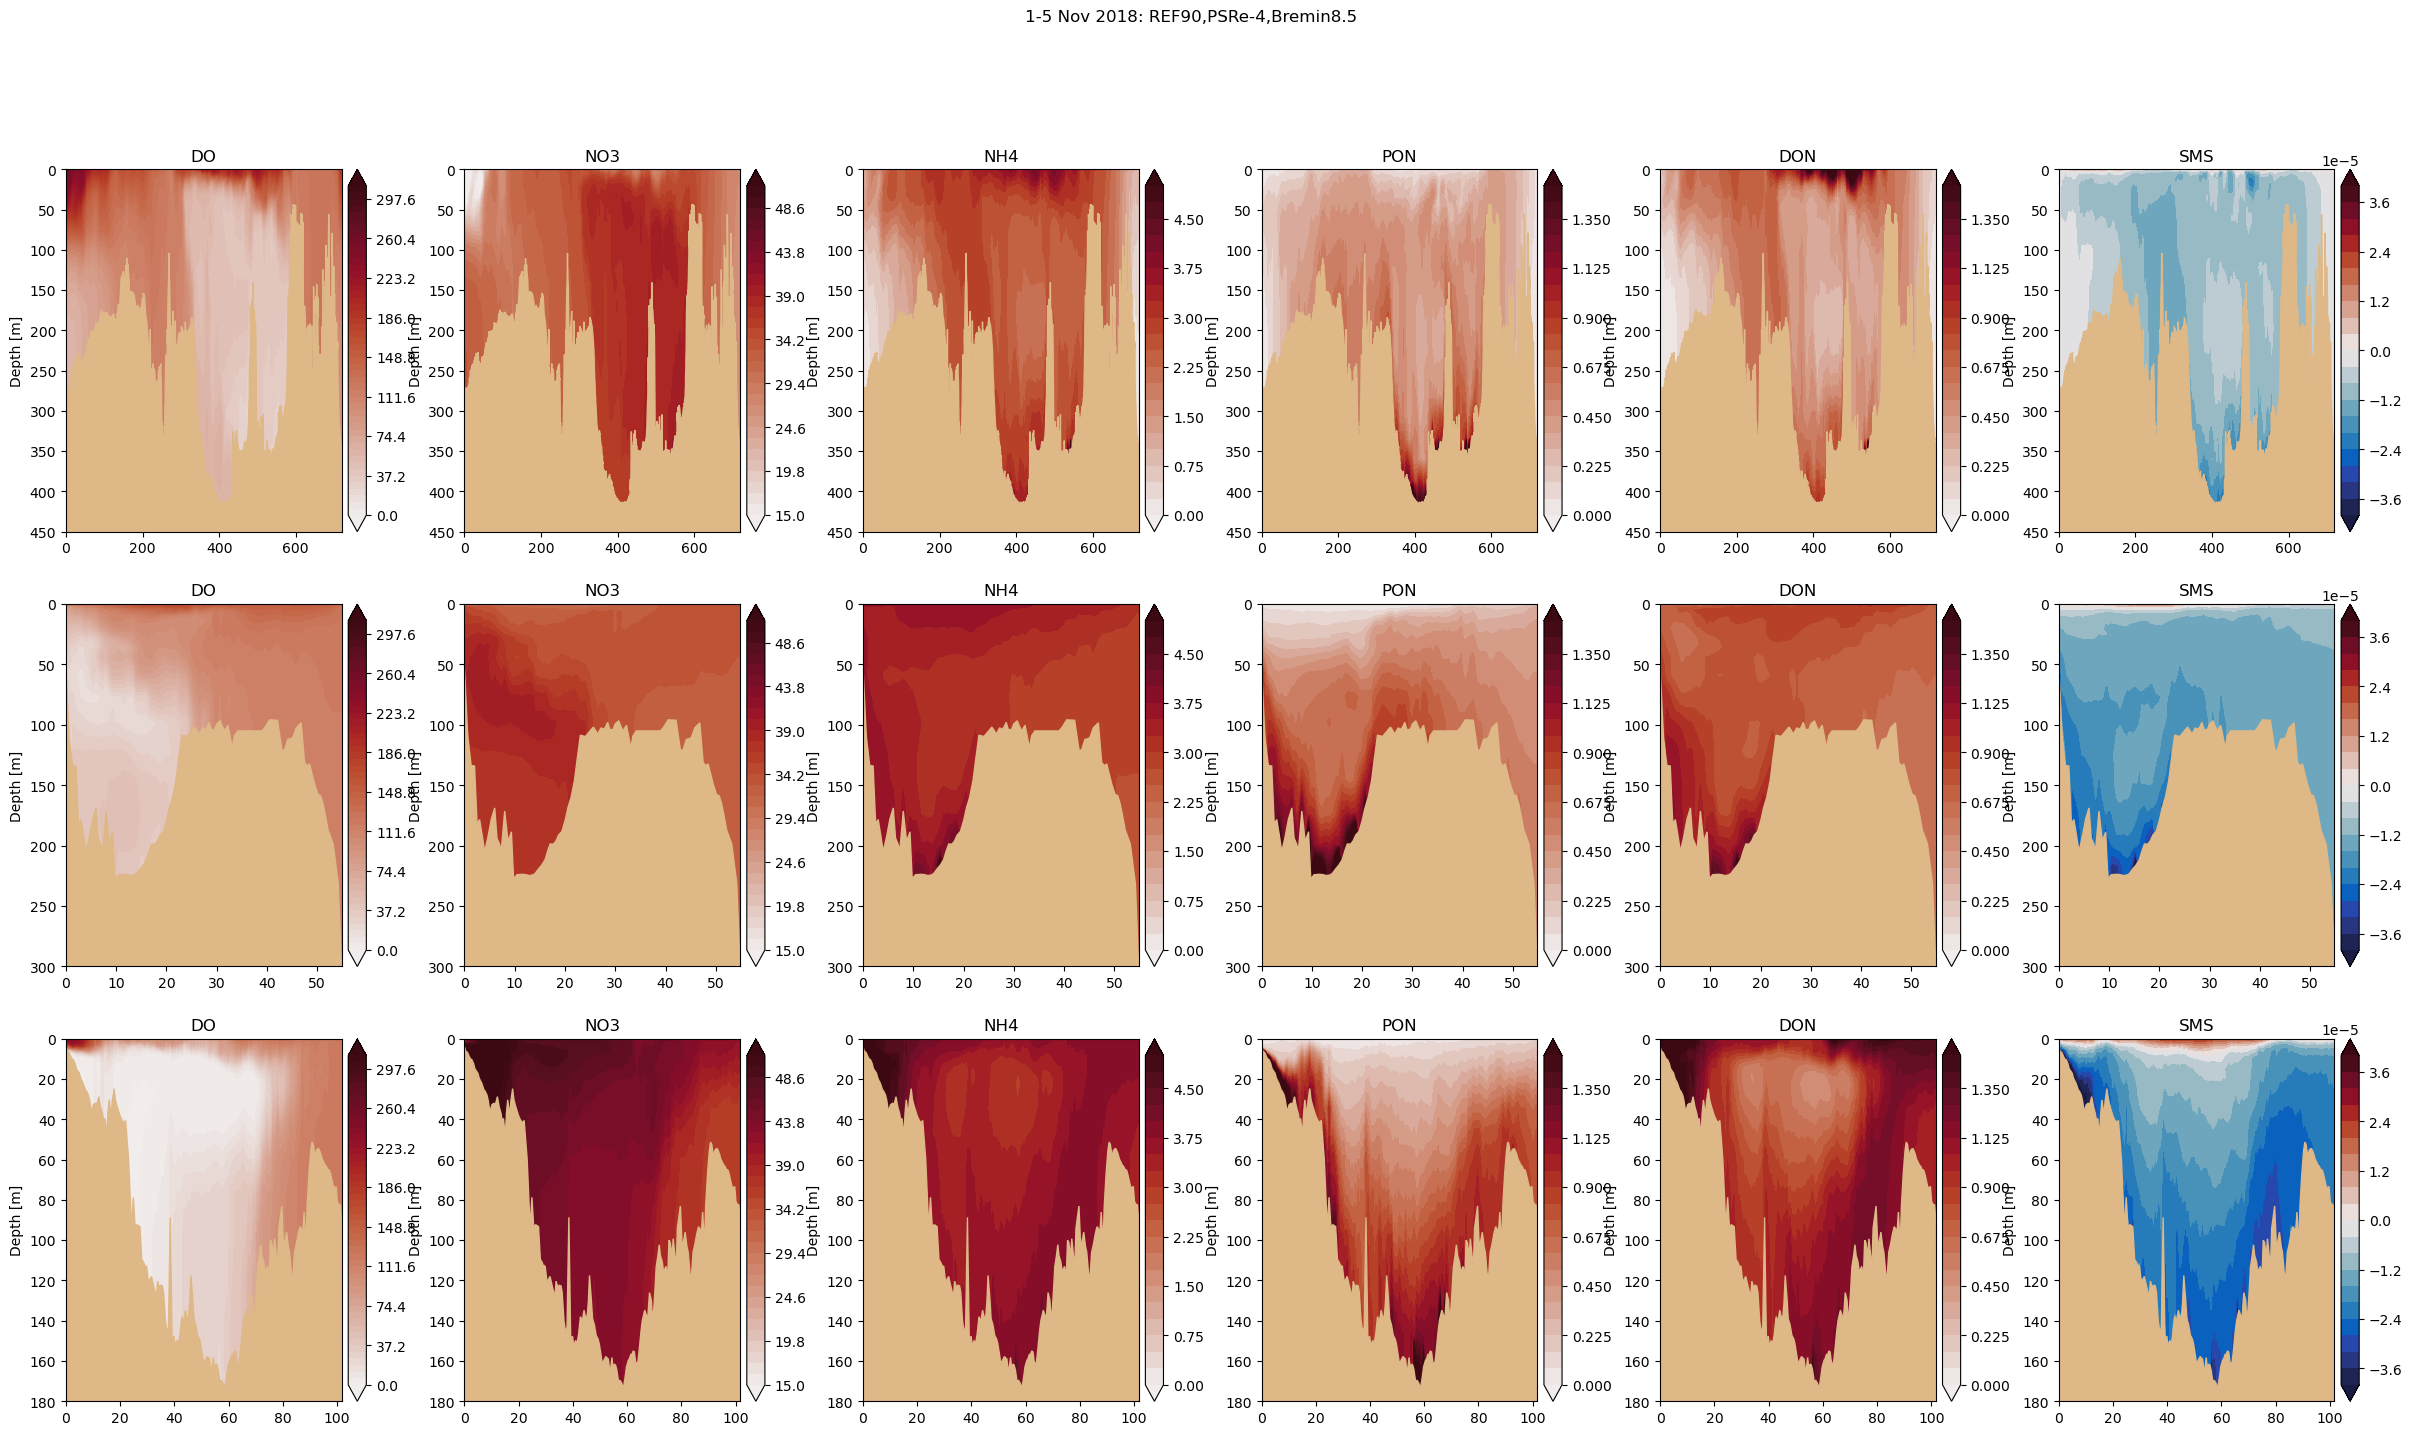

In [10]:
line, col = (3, 6)
fig, axs = plt.subplots(line, col, figsize=(30, 16))
title = list(['DO','NO3','NH4','PON','DON','SMS'])
dir = '/ocean/sallen/timbucktwo/oxygen/'
for ii in range(0, line):
    if ii==0:
        thalweg=thalweg_ptsSoG
        depmin=450
        vmin,vmax=(20,450)
    elif ii==1:
        thalweg=thalweg_ptsSI[::-1]
        depmin=300
        vmin,vmax=(20,250)
    else:
        thalweg=thalweg_ptsHC
        depmin=180
        vmin,vmax=(20,200)
    first = True
    for iii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
        year = day.year
        yr2 = day.strftime("%y")
        month = day.month
        Month = day.strftime("%b").lower()
        day = day.day
        # set up filename to follow NEMO conventions
        fchem90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
        with xr.open_dataset(fchem90) as ds_chem90:
            oxy0 = ds_chem90['dissolved_oxygen']
        fbiol90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_biol_T.nc'
        with xr.open_dataset(fbiol90) as ds_biol90:
            nit0 = ds_biol90['nitrate']
            amm0 = ds_biol90['ammonium']
            pon0 = ds_biol90['particulate_organic_nitrogen']
            don0 = ds_biol90['dissolved_organic_nitrogen']
        fgrdT90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_grid_T.nc'
        with xr.open_dataset(fgrdT90) as ds_grdT90:
            sal0 = ds_grdT90['vosaline']
            tem0 = ds_grdT90['votemper']
        fdiag90 = f'{dir}{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_diag_T.nc'
        with xr.open_dataset(fdiag90) as ds_diag90:
            npp0 = ds_diag90['NPP']
            rpp0 = ds_diag90['RPP']
            rem0 = ds_diag90['RMIN']
            ntr0 = ds_diag90['NITR']
            mes0 = ds_diag90['RMES']
            mic0 = ds_diag90['RMIC']
        if first:
            first = False
            oxy = oxy0
            pon = pon0
            don = don0
            nit = nit0
            amm = amm0
            tem = tem0
            sal = sal0
            npp = npp0
            rpp = rpp0
            rem = rem0
            ntr = ntr0
            mes = mes0
            mic = mic0
        else:
            oxy = xr.concat([oxy, oxy0], dim='time_counter')
            nit = xr.concat([nit, nit0], dim='time_counter')
            amm = xr.concat([amm, amm0], dim='time_counter')
            pon = xr.concat([pon, pon0], dim='time_counter')
            don = xr.concat([don, don0], dim='time_counter')
            sal = xr.concat([sal, sal0], dim='time_counter')
            tem = xr.concat([tem, tem0], dim='time_counter')
            npp = xr.concat([npp, npp0], dim='time_counter')
            rpp = xr.concat([rpp, rpp0], dim='time_counter')
            rem = xr.concat([rem, rem0], dim='time_counter')
            nrt = xr.concat([ntr, ntr0], dim='time_counter')
            mes = xr.concat([mes, mes0], dim='time_counter')
            mic = xr.concat([mic, mic0], dim='time_counter')
    
    for jj  in range(0, col):
        cmap = cm.amp
        if jj==0:
            vars = oxy
            space = np.linspace(0, 310, 51)
        elif jj==1:
            vars=nit
            space = np.linspace(15, 51, 31)
        elif jj==2:
            vars=amm
            space = np.linspace(0, 5, 21)
        elif jj==3:
            vars=pon
            space = np.linspace(0, 1.5, 21)
        elif jj==4:
            vars=don
            space = np.linspace(0, 1.5, 21)
        else:
            vars= npp + rpp + rem + ntr + mes + mic
            space = np.linspace(-0.00004, 0.00004, 21)
            cmap = cm.balance

        dep_thal, distance, var_thal = vis.load_thalweg(
            depth[0, ...], np.array(vars).mean(axis=0), bathy['nav_lon'][:], bathy['nav_lat'][:],
                thalweg)
        var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg)
        colours_var = axs[ii,jj].contourf(distance, dep_thal, var_plot, space,
                                            cmap=cmap, extend='both')
        vis._add_bathy_patch(distance, bathy['Bathymetry'][:], thalweg, axs[ii,jj], color='burlywood')
        axs[ii,jj].invert_yaxis()
        axs[ii,jj].set_ylabel('Depth [m]');
        axs[ii,jj].set_ylim([depmin, 0])
        axs[ii,jj].set_title(f'{title[jj]}')
        cbar = fig.colorbar(colours_var, ax=axs[ii,jj], pad=0.02)
    
fig.suptitle('1-5 Nov 2018: REF90,PSRe-4,Bremin8.5')

